<a href="https://colab.research.google.com/github/PryanikZlo/Eee_baby_first_repository/blob/master/semaandegorlaba3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from bokeh.plotting import figure, output_file, show
from bokeh.io import output_notebook

In [0]:
url = "https://ru.wikipedia.org/wiki/%D0%A1%D0%BF%D0%B8%D1%81%D0%BE%D0%BA_%D1%82%D0%B5%D0%BF%D0%BB%D0%BE%D0%B2%D1%8B%D1%85_%D1%8D%D0%BB%D0%B5%D0%BA%D1%82%D1%80%D0%BE%D1%81%D1%82%D0%B0%D0%BD%D1%86%D0%B8%D0%B9_%D0%A0%D0%BE%D1%81%D1%81%D0%B8%D0%B8"
id_table = 0
df_power = pd.read_html(url, header = 0, index_col = 0)[id_table]
df_power

,Название,"Установленнаямощность, МВт","Тепловаямощность, Гкал/ч",Типустановки,Собственник,Регион,Основное топливо,Источник
№,,,,,,,,
1,Белгородская ТЭЦ,60,3604.0,ГТУ,ПАО «Квадра»,Белгородская область,Природный газ,✓[СиПР 1]
2,ГТ ТЭЦ «Луч»,60,624.0,ГТУ,ПАО «Квадра»,Белгородская область,Природный газ,✓[СиПР 1]
3,Мичуринская ГТ-ТЭЦ,36,80.0,ГТУ,АО «ГТ Энерго»,Белгородская область,Природный газ,✓[СиПР 1]
4,Губкинская ТЭЦ,29,148.0,ПТУ,ПАО «Квадра»,Белгородская область,Природный газ,✓[СиПР 1]
5,Владимирская ТЭЦ-2,596,11761.0,"ПТУ, ПГУ",ПАО «Т Плюс»,Владимирская область,Природный газ,✓[3]
...,...,...,...,...,...,...,...,...
70,Щекинская ГРЭС,400,78.0,ПТУ,ООО «Щекинская ГРЭС»,Тульская область,газ,✓[СиПР 14]
71,Ярославская ТЭЦ-1,81,474.0,ПТУ,ПАО «ТГК-2»,Ярославская область,газ,✓[СиПР 15]
72,Ярославская ТЭЦ-2,245,900.0,ПТУ,ПАО «ТГК-2»,Ярославская область,"газ, уголь",✓[СиПР 15]


In [0]:
df_power = df_power.sort_values(['Название'])
print(df_power)
print()

df_power = df_power.sort_values(['Типустановки'], ascending = False)
print(df_power)

              Название  ...            Источник
№                       ...                    
64     Алексинская ТЭЦ  ...  ✓[СиПР 14][14][15]
1     Белгородская ТЭЦ  ...           ✓[СиПР 1]
5   Владимирская ТЭЦ-2  ...                ✓[3]
7      Вологодская ТЭЦ  ...           ✓[СиПР 2]
13   Воронежская ТЭЦ-1  ...        ✓[СиПР 3][4]
..                 ...  ...                 ...
46      Шатурская ГРЭС  ...           ✓[СиПР 9]
70      Щекинская ГРЭС  ...          ✓[СиПР 14]
71   Ярославская ТЭЦ-1  ...          ✓[СиПР 15]
72   Ярославская ТЭЦ-2  ...          ✓[СиПР 15]
73   Ярославская ТЭЦ-3  ...          ✓[СиПР 15]

[74 rows x 8 columns]

                    Название  ...            Источник
№                             ...                    
64           Алексинская ТЭЦ  ...  ✓[СиПР 14][14][15]
54           Дягилевская ТЭЦ  ...           ✓[10][11]
46            Шатурская ГРЭС  ...           ✓[СиПР 9]
6          Череповецкая ГРЭС  ...           ✓[СиПР 2]
48          ТЭЦ-27 Мосэнерго

In [0]:
df_power_2 = df_power.copy()
df_power_2['Тепловая мощность за сутки'] = df_power_2['Тепловаямощность, Гкал/ч'] * 24

df_power_2['тип'] = np.where(df_power_2['Название'].str.find('ГРЭС') >= 0, 'ГРЭС', np.where(df_power_2['Название'].str.find('ТЭЦ') >= 0, 'ТЭЦ', '?'))

print(df_power_2)
print()

df_power_2['проверка_расчетов'] =  df_power_2['Тепловая мощность за сутки'] / df_power_2['Тепловаямощность, Гкал/ч'] == 24
print(df_power_2)

                    Название  ...   тип
№                             ...      
64           Алексинская ТЭЦ  ...   ТЭЦ
54           Дягилевская ТЭЦ  ...   ТЭЦ
46            Шатурская ГРЭС  ...  ГРЭС
6          Череповецкая ГРЭС  ...  ГРЭС
48          ТЭЦ-27 Мосэнерго  ...   ТЭЦ
..                       ...  ...   ...
8                    ТЭЦ ПВС  ...   ТЭЦ
10     ТЭЦ ФосАгро-Череповец  ...   ТЭЦ
9                  ТЭЦ ЭВС-2  ...   ТЭЦ
68  ТЭЦ-ПВС ПАО «Тулачермет»  ...   ТЭЦ
28                 УТЭЦ НЛМК  ...   ТЭЦ

[74 rows x 10 columns]

                    Название  ... проверка_расчетов
№                             ...                  
64           Алексинская ТЭЦ  ...              True
54           Дягилевская ТЭЦ  ...              True
46            Шатурская ГРЭС  ...              True
6          Череповецкая ГРЭС  ...              True
48          ТЭЦ-27 Мосэнерго  ...              True
..                       ...  ...               ...
8                    ТЭЦ ПВС  ...      

In [0]:
print('все данные из столбцов \'Тепловаямощность, Гкал/ч\' и \'Тепловая мощность за сутки\'')
print(df_power_2[['Тепловаямощность, Гкал/ч', 'Тепловая мощность за сутки']])
print()
print('все данные из столбца \'тип\'')
print(df_power_2.тип)
print()

все данные из столбцов 'Тепловаямощность, Гкал/ч' и 'Тепловая мощность за сутки'
    Тепловаямощность, Гкал/ч  Тепловая мощность за сутки
№                                                       
64                     231.0                      5544.0
54                     421.0                     10104.0
46                    3443.0                     82632.0
6                       39.0                       936.0
48                    1876.0                     45024.0
..                       ...                         ...
8                        NaN                         NaN
10                       NaN                         NaN
9                        NaN                         NaN
68                       NaN                         NaN
28                       NaN                         NaN

[74 rows x 2 columns]

все данные из столбца 'тип'
№
64     ТЭЦ
54     ТЭЦ
46    ГРЭС
6     ГРЭС
48     ТЭЦ
      ... 
8      ТЭЦ
10     ТЭЦ
9      ТЭЦ
68     ТЭЦ
28     ТЭЦ
Nam

In [0]:
df_power = df_power_2.drop(['Источник'], axis='columns')
df_power = df_power_2.drop(['Основное топливо'], axis='columns')
df_power = df_power_2.drop(['Регион'], axis='columns')
df_power = df_power_2.drop(['Собственник'], axis='columns')
print(df_power)

                    Название  ... проверка_расчетов
№                             ...                  
64           Алексинская ТЭЦ  ...              True
54           Дягилевская ТЭЦ  ...              True
46            Шатурская ГРЭС  ...              True
6          Череповецкая ГРЭС  ...              True
48          ТЭЦ-27 Мосэнерго  ...              True
..                       ...  ...               ...
8                    ТЭЦ ПВС  ...             False
10     ТЭЦ ФосАгро-Череповец  ...             False
9                  ТЭЦ ЭВС-2  ...             False
68  ТЭЦ-ПВС ПАО «Тулачермет»  ...             False
28                 УТЭЦ НЛМК  ...             False

[74 rows x 10 columns]


In [0]:
print(df_power[df_power['Тепловаямощность, Гкал/ч'] > 3000.])
print() 

               Название Установленнаямощность, МВт  ...   тип проверка_расчетов
№                                                   ...                        
46       Шатурская ГРЭС                       1500  ...  ГРЭС              True
30               ТЭЦ-26                      18409  ...   ТЭЦ              True
31               ТЭЦ-21                       1765  ...   ТЭЦ              True
66  Новомосковская ГРЭС                      23365  ...  ГРЭС              True
55   Ново-Рязанская ТЭЦ                        430  ...   ТЭЦ              True
5    Владимирская ТЭЦ-2                        596  ...   ТЭЦ              True
47     ТЭЦ-22 Мосэнерго                       1070  ...   ТЭЦ              True
32               ТЭЦ-23                       1420  ...   ТЭЦ              True
33               ТЭЦ-25                       1370  ...   ТЭЦ              True
16     Ивановская ТЭЦ-2                        200  ...   ТЭЦ              True
1      Белгородская ТЭЦ                 

In [0]:
print(df_power.groupby(['тип'])['Тепловаямощность, Гкал/ч'].sum())
print()

тип
?         2483.0
ГРЭС     12289.0
ТЭЦ     231569.0
Name: Тепловаямощность, Гкал/ч, dtype: float64



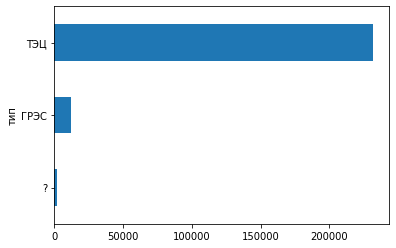

In [0]:
df_power.groupby(['тип'])['Тепловаямощность, Гкал/ч'].sum().plot(kind = 'barh')
print()

In [0]:
import matplotlib.pyplot as plt
 
labels = ['Белгородская ТЭЦ', 'ГТ ТЭЦ «Луч»	','Мичуринская ГТ-ТЭЦ	','Губкинская ТЭЦ','Ярославская ТЭЦ-1	']

sizes = [60,60,36,29,81]

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


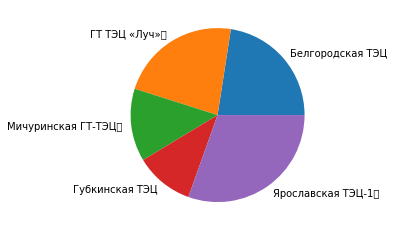

In [0]:
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels)
plt.show()

In [0]:
# Подключение библиотек для интерактивного графика
from bokeh.plotting import figure, output_file, show
from bokeh.io import output_notebook
import numpy as np

output_notebook()

# Построение интерактивной гистограммы
p = figure(x_range=df_power.iloc[: , 0], plot_width=1600, plot_height=400, title="Установленнаямощность, МВт")

p.vbar(x=df_power.iloc[: , 0], top=df_power.iloc[: , 1], width=0.5)

p.xgrid.grid_line_color = None
p.y_range.start = 0

show(p)
